<h1><center><b>Super Store Analysis</b></center></h1>
importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("train.csv")

Check the imported data

In [4]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


Checking Shape of Dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

Calculate no of null values

In [10]:
null_count=data['Postal Code'].isnull().sum()
print(null_count)

11


Filling empty columns with 0

In [13]:
data['Postal Code'].fillna(0,inplace=True)

In [15]:
data['Postal Code'].isnull().sum()

0

In [16]:
#changing datatype to integer
data['Postal Code']=data['Postal Code'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   int32  
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

Data Describtion

In [17]:
data.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9800.000000,9800.000000
mean,4900.500000,55211.280918,230.769059
std,2829.160653,32076.677954,626.651875
min,1.000000,0.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,57551.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


<h3>Data Cleaning</h3>
checking dublicates

In [8]:
if data.duplicated().sum() > 0:
print("dublicates are present")
else:
    print("no duplicates")

IndentationError: expected an indented block after 'if' statement on line 1 (3257258644.py, line 2)

In [26]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9795    False
9796    False
9797    False
9798    False
9799    False
Length: 9800, dtype: bool

<h3><b>Exploratory Data Analysis</b></h3>
<h4>Customer analysis</h4>
Customer segmentation

In [6]:
data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [7]:
#types of customers
types_of_customers = data['Segment'].unique()
print(types_of_customers)

['Consumer' 'Corporate' 'Home Office']


In [16]:
#number of customers in each segment
numbers_of_customers= data['Segment'].value_counts().reset_index()
print(numbers_of_customers)
numbers_of_customers= numbers_of_customers.rename(columns={'index':'customer_type','Segment':'total_customer'})
print(numbers_of_customers)

         index  Segment
0     Consumer     5101
1    Corporate     2953
2  Home Office     1746
  customer_type  total_customer
0      Consumer            5101
1     Corporate            2953
2   Home Office            1746


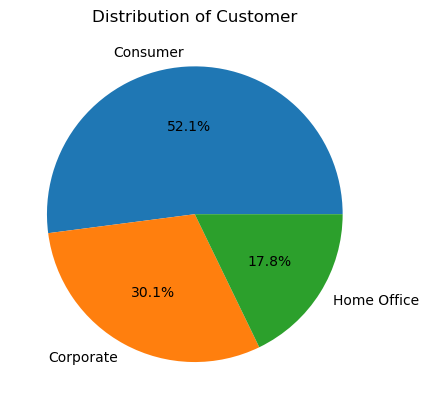

In [20]:
#plotting a pie chart
plt.pie(numbers_of_customers['total_customer'],labels=numbers_of_customers['customer_type'],autopct='%1.1f%%')
#set pie chart title
plt.title('Distribution of Customer')
plt.show()

<b>Customer and Sales</b>

In [26]:
sales_per_category= data.groupby('Segment')['Sales'].sum().reset_index()
sales_per_category=sales_per_category.rename(columns={'Segment':'Customer Type','Sales':'Total Sales'})
print(sales_per_category)

  Customer Type   Total Sales
0      Consumer  1.148061e+06
1     Corporate  6.884941e+05
2   Home Office  4.249822e+05


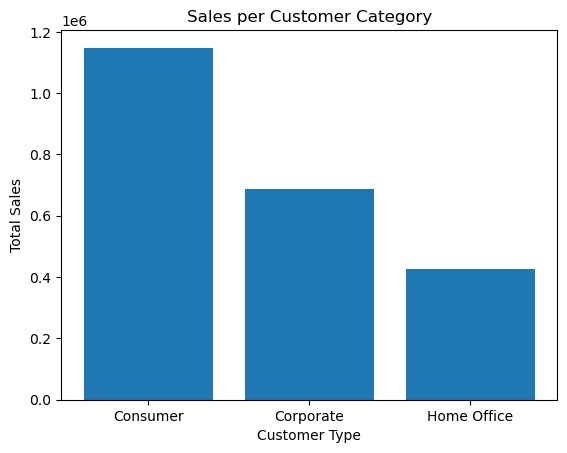

In [27]:
#bar Graph
plt.bar(sales_per_category['Customer Type'], sales_per_category['Total Sales'])
#label
plt.title('Sales per Customer Category')
plt.xlabel('Customer Type')
plt.ylabel('Total Sales')

plt.show()

<h3>Customer Loyalty</h3>

In [28]:
data.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94


In [35]:
#Group data according to: Customer ID, Customer Name, Segment and calculate freq. of their orders
customer_order_freq = data.groupby(['Customer ID','Customer Name','Segment'])['Order ID'].count().reset_index()
#Rename the order ID column
customer_order_freq.rename(columns={'Order ID':'Total Orders'},inplace=True)
#Identify repeat customer
repeat_customers = customer_order_freq[customer_order_freq['Total Orders']>=1]

#sort repeat customer in descending order
sorted_repeat_customers= repeat_customers.sort_values(by='Total Orders',ascending=False)
print(sorted_repeat_customers.head(10).reset_index(drop=True))

  Customer ID        Customer Name      Segment  Total Orders
0    WB-21850        William Brown     Consumer            35
1    PP-18955           Paul Prost  Home Office            34
2    MA-17560         Matt Abelman  Home Office            34
3    JL-15835             John Lee     Consumer            33
4    CK-12205  Chloris Kastensmidt     Consumer            32
5    SV-20365          Seth Vernon     Consumer            32
6    JD-15895     Jonathan Doherty    Corporate            32
7    AP-10915       Arthur Prichep     Consumer            31
8    ZC-21910     Zuschuss Carroll     Consumer            31
9    EP-13915           Emily Phan     Consumer            31


Ranking Customer

In [37]:
#group data based on : Customer ID, Customer Name and Sales
customer_sales = data.groupby(['Customer ID','Customer Name','Segment'])['Sales'].sum().reset_index()

#Sort in descending order
top_spenders= customer_sales.sort_values(by='Sales',ascending=False)
#print the output
print(top_spenders.head(10).reset_index(drop=True))

  Customer ID       Customer Name      Segment      Sales
0    SM-20320         Sean Miller  Home Office  25043.050
1    TC-20980        Tamara Chand    Corporate  19052.218
2    RB-19360        Raymond Buch     Consumer  15117.339
3    TA-21385        Tom Ashbrook  Home Office  14595.620
4    AB-10105       Adrian Barton     Consumer  14473.571
5    KL-16645        Ken Lonsdale     Consumer  14175.229
6    SC-20095        Sanjit Chand     Consumer  14142.334
7    HL-15040        Hunter Lopez     Consumer  12873.298
8    SE-20110        Sanjit Engle     Consumer  12209.438
9    CC-12370  Christopher Conant     Consumer  12129.072


Mode of Shipping

In [45]:
data['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [46]:
#Frequency of shiping methods
shipping_mode= data['Ship Mode'].value_counts().reset_index()
shipping_mode= shipping_mode.rename(columns={'index':'Mode of Shipment','Ship Mode':'Use Frequency'})
print(shipping_mode)

  Mode of Shipment  Use Frequency
0   Standard Class           5859
1     Second Class           1902
2      First Class           1501
3         Same Day            538


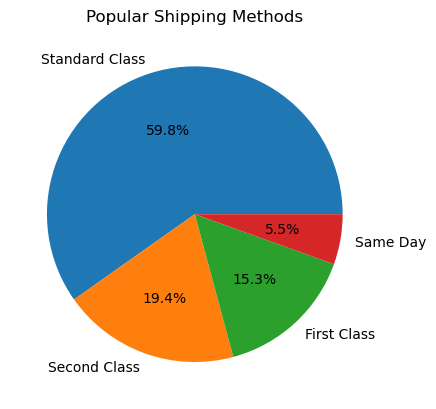

In [48]:
#Plotting a pie chart
plt.pie(shipping_mode['Use Frequency'],labels=shipping_mode['Mode of Shipment'],autopct='%1.1f%%')

#set labels
plt.title('Popular Shipping Methods')
plt.show()

Graphical Analysis

In [49]:
state= data['State'].value_counts().reset_index()
state= state.rename(columns={'index':'State','State':'Number of Customers'})
print(state)

                   State  Number of Customers
0             California                 1946
1               New York                 1097
2                  Texas                  973
3           Pennsylvania                  582
4             Washington                  504
5               Illinois                  483
6                   Ohio                  454
7                Florida                  373
8               Michigan                  253
9         North Carolina                  247
10              Virginia                  224
11               Arizona                  223
12             Tennessee                  183
13              Colorado                  179
14               Georgia                  177
15              Kentucky                  137
16               Indiana                  135
17         Massachusetts                  135
18                Oregon                  122
19            New Jersey                  122
20              Maryland          

In [54]:
# Sales per state

#grouping state and sales
state_sales= data.groupby(['State'])['Sales'].sum().reset_index()

#sorting stating from highest state
top_state_sales = state_sales.sort_values(by='Sales',ascending=False)
print(top_state_sales.head(10).reset_index(drop=True))

          State        Sales
0    California  446306.4635
1      New York  306361.1470
2         Texas  168572.5322
3    Washington  135206.8500
4  Pennsylvania  116276.6500
5       Florida   88436.5320
6      Illinois   79236.5170
7      Michigan   76136.0740
8          Ohio   75130.3500
9      Virginia   70636.7200


In [55]:
# Sales per city

#grouping city and sales
city_sales= data.groupby(['City'])['Sales'].sum().reset_index()

#sorting stating from highest state
top_city_sales = city_sales.sort_values(by='Sales',ascending=False)
print(top_city_sales.head(10).reset_index(drop=True))

            City        Sales
0  New York City  252462.5470
1    Los Angeles  173420.1810
2        Seattle  116106.3220
3  San Francisco  109041.1200
4   Philadelphia  108841.7490
5        Houston   63956.1428
6        Chicago   47820.1330
7      San Diego   47521.0290
8   Jacksonville   44713.1830
9        Detroit   42446.9440


<b>Product Analysis </b>

In [56]:
data.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94


In [57]:
#Types of products
data['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [62]:
#group by types of product
subcategory_count=data.groupby('Category')['Sub-Category'].nunique().reset_index()

#sort by ascending order
subcategory_count =subcategory_count.sort_values(by='Sub-Category',ascending=False)
print(subcategory_count)

          Category  Sub-Category
1  Office Supplies             9
0        Furniture             4
2       Technology             4


<h2>Sales per Product Category</h2>

In [63]:
category_sales = data.groupby(['Category'])['Sales'].sum().reset_index()
print(category_sales)

          Category        Sales
0        Furniture  728658.5757
1  Office Supplies  705422.3340
2       Technology  827455.8730


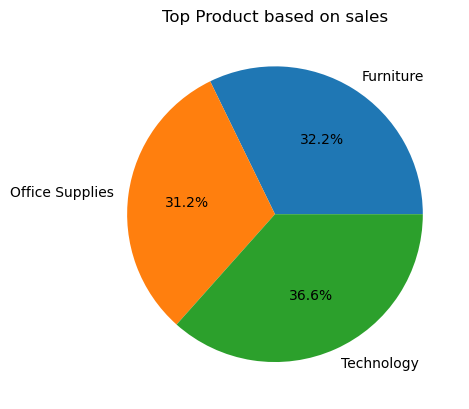

In [64]:
#plotting a pie chart
plt.pie(category_sales['Sales'],labels=category_sales['Category'],autopct='%1.1f%%')
#set labels
plt.title('Top Product based on sales')
plt.show()

Sales per product

In [2]:
#group data by product subcatagory vs sales
pdt_subcategory = data.groupby(['Sub-Category'])['Sales'].sum().reset_index()

#sorting in desc order
top_pdt_subcategory= pdt_subcategory.sort_values(by='Sales',ascending=False)
print(top_pdt_subcategory)

   Sub-Category        Sales
13       Phones  327782.4480
5        Chairs  322822.7310
14      Storage  219343.3920
16       Tables  202810.6280
3       Binders  200028.7850
11     Machines  189238.6310
0   Accessories  164186.7000
6       Copiers  146248.0940
4     Bookcases  113813.1987
1    Appliances  104618.4030
9   Furnishings   89212.0180
12        Paper   76828.3040
15     Supplies   46420.3080
2           Art   26705.4100
7     Envelopes   16128.0460
10       Labels   12347.7260
8     Fasteners    3001.9600


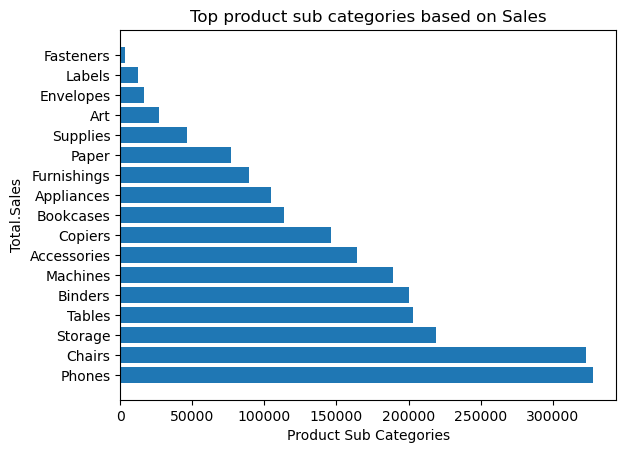

In [3]:
#plot a horizonatal bar graphs
plt.barh(top_pdt_subcategory['Sub-Category'],top_pdt_subcategory['Sales'])

#label
plt.title('Top product sub categories based on Sales')
plt.xlabel('Product Sub Categories')
plt.ylabel('Total.Sales')
plt.show()

<h3>Sales Trend Analysis</h3>

In [5]:
#convert order date to determine format
data['Order Date'] = pd.to_datetime(data['Order Date'],dayfirst=True)
#grouping by year and suming sales per year
yearly_sales= data.groupby(data['Order Date'].dt.year)['Sales'].sum()
#setting new index and rename the columns
yearly_sales= yearly_sales.reset_index()
yearly_sales= yearly_sales.rename(columns={'Order Date':'Year','Sales':'Total Sales'})

print(yearly_sales)

   Year  Total Sales
0  2015  479856.2081
1  2016  459436.0054
2  2017  600192.5500
3  2018  722052.0192


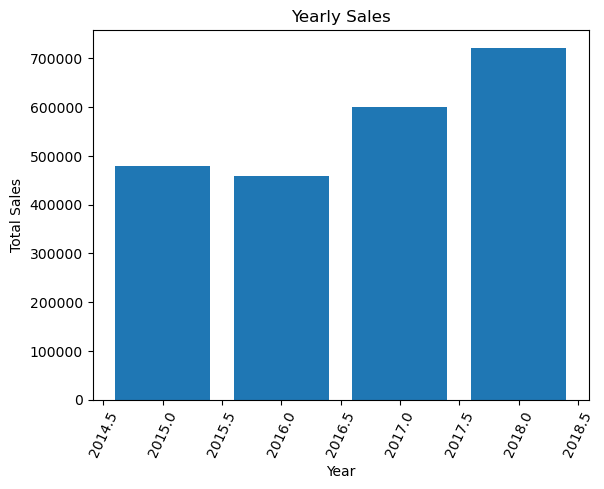

In [7]:
#plotting the horizontal bar graph
plt.bar(yearly_sales['Year'],yearly_sales['Total Sales'])

#label
plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales')
#labels rotation of x-axis
plt.xticks(rotation=65)


plt.show()

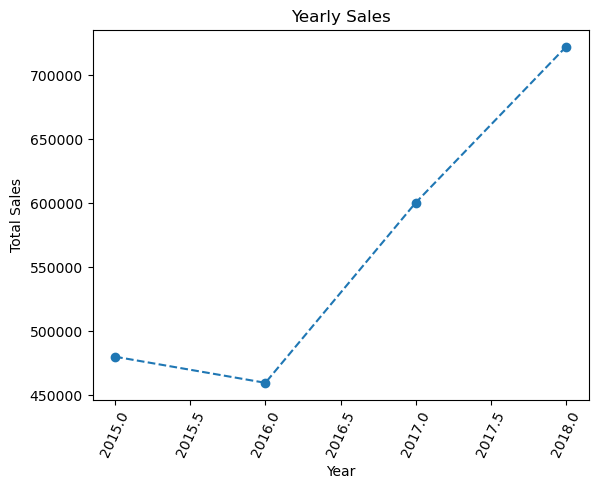

In [9]:
#plotting the line graph
plt.plot(yearly_sales['Year'],yearly_sales['Total Sales'],marker='o',linestyle='--')

#label
plt.title('Yearly Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales')
#labels rotation of x-axis
plt.xticks(rotation=65)


plt.show()

<h3>Quartly Sales Treands</h3>

In [10]:
#convert order date to determine format
data['Order Date']= pd.to_datetime(data['Order Date'],dayfirst=True)
#filter data according to year
year_sales = data[data['Order Date'].dt.year==2018]
#calculate quartly sales of year 2018
quartly_sales= year_sales.resample('Q', on='Order Date')['Sales'].sum()
quartly_sales= quartly_sales.reset_index()
quartly_sales= quartly_sales.rename(columns={'Order Date':'Quarter','Sales':'Total Sales'})
print('this is quartly sales of 2018')
print(quartly_sales)

this is quartly sales of 2018
     Quarter  Total Sales
0 2018-03-31  122260.8842
1 2018-06-30  127558.6200
2 2018-09-30  193815.8400
3 2018-12-31  278416.6750


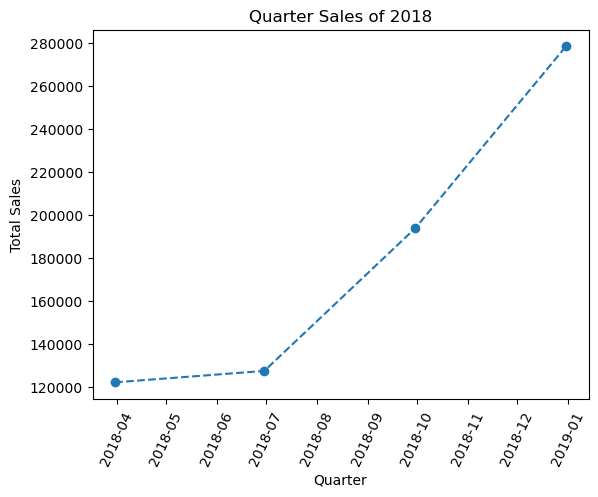

In [11]:
#plotting the line graph
plt.plot(quartly_sales['Quarter'],quartly_sales['Total Sales'],marker='o',linestyle='--')

#label
plt.title('Quarter Sales of 2018')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
#labels rotation of x-axis
plt.xticks(rotation=65)


plt.show()

<h3>Monthy sales treand for a year </h3>

In [12]:
data['Order Date']= pd.to_datetime(data['Order Date'],dayfirst=True)
#filterdata according to year
year_sales=data[data['Order Date'].dt.year==2018]
#calculate qquartly sales for year 2018
monthy_sales= year_sales.resample('M',on='Order Date')['Sales'].sum()

#rename columns
monthy_sales= monthy_sales.reset_index()
monthy_sales= monthy_sales.rename(columns={'Order Date':'Month','Sales':'Total Monthly Sales'})
print(monthy_sales)

        Month  Total Monthly Sales
0  2018-01-31           43476.4740
1  2018-02-28           19920.9974
2  2018-03-31           58863.4128
3  2018-04-30           35541.9101
4  2018-05-31           43825.9822
5  2018-06-30           48190.7277
6  2018-07-31           44825.1040
7  2018-08-31           62837.8480
8  2018-09-30           86152.8880
9  2018-10-31           77448.1312
10 2018-11-30          117938.1550
11 2018-12-31           83030.3888


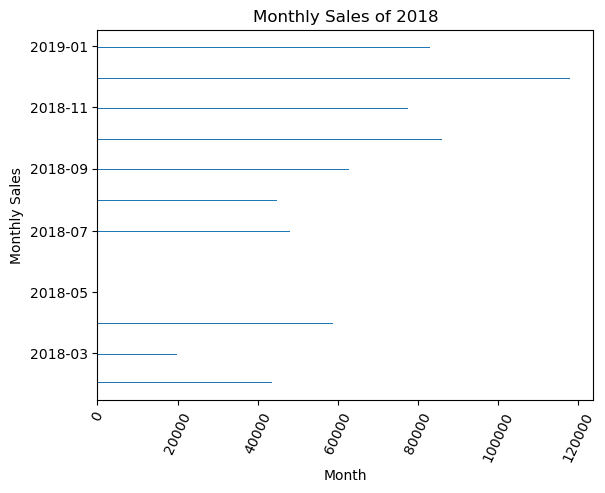

In [16]:
#plotting the line graph
plt.barh(monthy_sales['Month'],monthy_sales['Total Monthly Sales'])

#label
plt.title('Monthly Sales of 2018')
plt.xlabel('Month')
plt.ylabel('Monthly Sales')
#labels rotation of x-axis
plt.xticks(rotation=65)


plt.show()